In [25]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
import numpy as np
import pandas as pd
from yahoofinancials import YahooFinancials
import matplotlib.pyplot as plt

# Exemplo de teste Dickey-Fuller
data = np.random.rand(100)
result = adfuller(data)
print('Estatística do teste de Dickey-Fuller:', result[0])
print('Valor p:', result[1])

Estatística do teste de Dickey-Fuller: -11.057561540572754
Valor p: 4.901209748328913e-20


In [26]:
data

array([0.13971853, 0.33761044, 0.81355283, 0.79399529, 0.85921212,
       0.15788328, 0.34954954, 0.00188949, 0.70092952, 0.79603366,
       0.06614685, 0.45302602, 0.6795932 , 0.58724669, 0.33749131,
       0.70598887, 0.41638269, 0.55266805, 0.61500389, 0.29434511,
       0.88403462, 0.82771644, 0.79276887, 0.17637946, 0.67295608,
       0.81452682, 0.89448254, 0.31064041, 0.59216602, 0.88065253,
       0.96303619, 0.98062468, 0.34465243, 0.22248171, 0.43968174,
       0.76412769, 0.34371278, 0.28256318, 0.58956045, 0.07783996,
       0.63284815, 0.56201362, 0.47239365, 0.53764249, 0.86240219,
       0.19091249, 0.49873258, 0.70880474, 0.74905491, 0.75609752,
       0.59901017, 0.68660265, 0.14466107, 0.12146803, 0.78742228,
       0.30526729, 0.22535085, 0.92909796, 0.80892135, 0.49071853,
       0.4304567 , 0.24300243, 0.10659996, 0.72284214, 0.7834481 ,
       0.06923664, 0.23534007, 0.07108681, 0.94520759, 0.40194523,
       0.93859671, 0.48458798, 0.76618188, 0.6070839 , 0.77480

In [27]:
result

(-11.057561540572754,
 4.901209748328913e-20,
 0,
 99,
 {'1%': -3.498198082189098,
  '5%': -2.891208211860468,
  '10%': -2.5825959973472097},
 21.63718716142799)

## Aplicando o teste de Dickey-Fuller na série de Soja (Yahoo Finance)

In [28]:
lista_codigos = ['ZS=F']  #soja grão
dados_yahoo = YahooFinancials(lista_codigos)
preco_diario = dados_yahoo.get_historical_price_data('1999-01-01', '2024-02-07', 'daily')
precos_soja = pd.DataFrame({a: {x['formatted_date']: x['adjclose'] for x in preco_diario[a]['prices']} for a in lista_codigos})

# Pré-processamento
precos_soja.reset_index(inplace=True)
precos_soja = precos_soja.rename(columns={'index':'Data'}).copy()
precos_soja.set_index('Data', inplace=True)
precos_soja.index = pd.to_datetime(precos_soja.index)

precos_soja

,ZS=F
Data,
2000-09-15,493.75
2000-09-18,484.00
2000-09-19,484.25
2000-09-20,483.25
2000-09-21,486.50
...,...
2024-01-31,1222.25
2024-02-01,1203.25
2024-02-02,1188.50


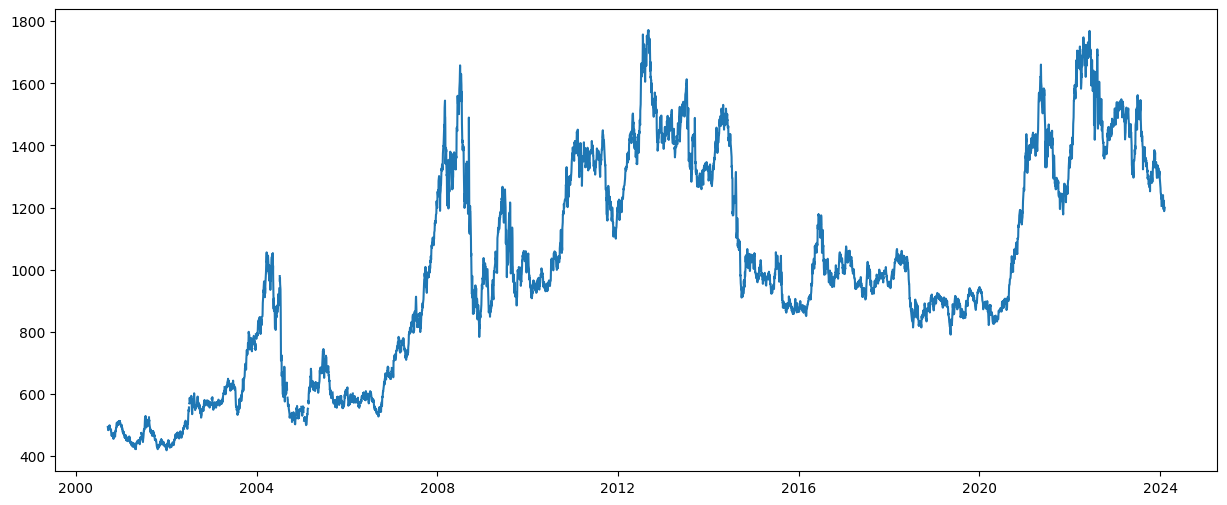

In [29]:
plt.figure(figsize=(15,6))
plt.plot(precos_soja)
plt.show()

In [30]:
dados_soja = precos_soja.dropna()
result_soja = adfuller(dados_soja)
print('Estatística do teste de Dickey-Fuller:', result[0])
print('Valor p:', result[1])

Estatística do teste de Dickey-Fuller: -11.057561540572754
Valor p: 4.901209748328913e-20


In [31]:
result_soja

(-2.2916678021697847,
 0.17466935495309716,
 23,
 5860,
 {'1%': -3.431466410719843,
  '5%': -2.8620333487528327,
  '10%': -2.567032607397873},
 50337.43377927236)